In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from word2number import w2n 

In [170]:
df = pd.read_csv(r"C:/Users/MUNNA/OneDrive/Documents/2nd SEMESTER ALL FILES\MY Projects 2nd SEM/Data cleaning/Messy_Patient_Data.csv")
df

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate,Doctor_Notes
0,PID1000,Patient_0,0,Female,"Saturday, October 21, 2017",43225,Unknown,Elevated Pressure,NaN,pt. is stable
1,PID1001,Patient_1,0,FEMALE,44819,24/01/2024,43715,NaN,120.5,Monitor blood sugar levels
2,PID1002,Patient_2,0,Male,Z04,2021-03-14abc,Unknown,??,120.5,Pain in left leg.
3,PID1003,Patient_3,unknown,male,42989,45763,13/09/2018,Hypertension,NaN,1234
4,PID1004,Patient_4,0,Female,43663,NaN,42724,H.B.P,120.5,NaN
...,...,...,...,...,...,...,...,...,...,...
96,PID1096,Patient_96,NaN,Female,45211,42007,"Wednesday, November 11, 2015",NaN,90,no issues
97,PID1097,Patient_97,unknown,NaN,NaN,42373,NaN,high BP,120.5,!!!
98,PID1098,Patient_98,NaN,NaN,NaN,"Thursday, July 16, 2015",NaN,NaN,120.5,1234
99,PID1099,Patient_99,Twenty five,Male,NaN,NaN,Z04,HBP,120.5,Feeling better today


# Basic Data Exploration

In [171]:
df.head(10)

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate,Doctor_Notes
0,PID1000,Patient_0,0,Female,"Saturday, October 21, 2017",43225,Unknown,Elevated Pressure,NaN,pt. is stable
1,PID1001,Patient_1,0,FEMALE,44819,24/01/2024,43715,NaN,120.5,Monitor blood sugar levels
2,PID1002,Patient_2,0,Male,Z04,2021-03-14abc,Unknown,??,120.5,Pain in left leg.
3,PID1003,Patient_3,unknown,male,42989,45763,13/09/2018,Hypertension,NaN,1234
4,PID1004,Patient_4,0,Female,43663,NaN,42724,H.B.P,120.5,NaN
5,PID1005,Patient_5,Twenty five,Female,Unknown,42509,43708,HBP,One hundred,1234
6,PID1006,Patient_6,0,FEMALE,45901,NaN,20211227,NaN,NaN,!!!
7,PID1007,Patient_7,NaN,NaN,44733,Z04,2023-11-09abc,NaN,NaN,X
8,PID1008,Patient_8,41,NaN,44792,45487,"Friday, January 24, 2025",NaN,high,NaN
9,PID1009,Patient_9,NaN,Female,NaN,2021-11-20abc,43100,HBP,165,Pain in left leg.


In [172]:
df.shape

(101, 10)

In [173]:
df.dtypes

Patient_ID            object
Name                  object
Age                   object
Gender                object
Check_in_Date         object
First_Consultation    object
Next_Visit            object
Diagnosis             object
Heart_Rate            object
Doctor_Notes          object
dtype: object

In [174]:
df.isnull().sum()

Patient_ID             0
Name                   0
Age                   29
Gender                31
Check_in_Date         17
First_Consultation    21
Next_Visit            19
Diagnosis             28
Heart_Rate            33
Doctor_Notes          17
dtype: int64

In [175]:
df.duplicated().sum()

0

In [176]:
df.describe()

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate,Doctor_Notes
count,101,101,72,70,84,80,82,73,68,84
unique,101,101,13,4,68,72,69,9,15,10
top,PID1000,Patient_0,0,male,Z04,Z04,Z04,HBP,120.5,1234
freq,1,1,12,19,10,7,11,14,23,13


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient_ID          101 non-null    object
 1   Name                101 non-null    object
 2   Age                 72 non-null     object
 3   Gender              70 non-null     object
 4   Check_in_Date       84 non-null     object
 5   First_Consultation  80 non-null     object
 6   Next_Visit          82 non-null     object
 7   Diagnosis           73 non-null     object
 8   Heart_Rate          68 non-null     object
 9   Doctor_Notes        84 non-null     object
dtypes: object(10)
memory usage: 8.0+ KB


In [178]:
df.drop(columns = ["Doctor_Notes"], inplace = True)

# Data Preprocessing

In [179]:
#Converting the age column into consistent format

def clean_age(val):
    # If the value is null, return None.
    if pd.isnull(val):
        return None
    
    # If the value is already numeric, just return it.
    if isinstance(val, (int, float)):
        return val
    
    # Convert to a stripped, lowercase string.
    val = str(val).strip().lower()
    
    # Check for digits within the string.
    digits = re.findall(r'\d+', val)
    if digits:
        return float(digits[0])  # Return the first occurrence.
    
    # If no digits are found, try converting the word(s) using w2n.
    try:
        return w2n.word_to_num(val)
    except Exception as e:
        # In case conversion fails, return None.
        return None

In [180]:
df['Age'] = df['Age'].apply(clean_age)
df.head()

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,Female,"Saturday, October 21, 2017",43225,Unknown,Elevated Pressure,NaN
1,PID1001,Patient_1,0.0,FEMALE,44819,24/01/2024,43715,NaN,120.5
2,PID1002,Patient_2,0.0,Male,Z04,2021-03-14abc,Unknown,??,120.5
3,PID1003,Patient_3,NaN,male,42989,45763,13/09/2018,Hypertension,NaN
4,PID1004,Patient_4,0.0,Female,43663,NaN,42724,H.B.P,120.5


In [181]:
#Since the column Heart_Rate consists of the same problem. lets apply the function to Heart_Rate too
df['Heart_Rate'] = df['Heart_Rate'].apply(clean_age)
df.head()

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,Female,"Saturday, October 21, 2017",43225,Unknown,Elevated Pressure,NaN
1,PID1001,Patient_1,0.0,FEMALE,44819,24/01/2024,43715,NaN,120.0
2,PID1002,Patient_2,0.0,Male,Z04,2021-03-14abc,Unknown,??,120.0
3,PID1003,Patient_3,NaN,male,42989,45763,13/09/2018,Hypertension,NaN
4,PID1004,Patient_4,0.0,Female,43663,NaN,42724,H.B.P,120.0


In [182]:
#Treating Gender column
print(df['Gender'].isnull().sum())  
print(df['Gender'].unique())        

31
['Female' 'FEMALE' 'Male' 'male' nan]


In [183]:
#Generalising the Gender column

df["Gender"] = (df["Gender"].replace(to_replace = ["nan", "NaN"], value = np.nan).
                fillna('unknown').astype(str).
                str.strip().str.lower().replace("nan", "NaN"))
df.head()

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,female,"Saturday, October 21, 2017",43225,Unknown,Elevated Pressure,NaN
1,PID1001,Patient_1,0.0,female,44819,24/01/2024,43715,NaN,120.0
2,PID1002,Patient_2,0.0,male,Z04,2021-03-14abc,Unknown,??,120.0
3,PID1003,Patient_3,NaN,male,42989,45763,13/09/2018,Hypertension,NaN
4,PID1004,Patient_4,0.0,female,43663,NaN,42724,H.B.P,120.0


In [184]:
#Treating Diagnosis
print(df['Diagnosis'].isnull().sum())
print(df['Diagnosis'].unique()) 

28
['Elevated Pressure' nan '??' 'Hypertension' 'H.B.P' 'HBP'
 'High blood pressure' 'high BP' 'HTN' '1234']


In [185]:
#Replacing the obvious naming formats

replacments = {
    'Elevated Pressure' : "High Blood Pressure",
    'H.B.P' : "High Blood Pressure",
    'HBP': "High Blood Pressure",
    'High blood pressure': "High Blood Pressure",
    'high BP': "High Blood Pressure",
    'HTN': 'Hypertension',
    '1234': "unknown",
    '??': "unknown"
}

df['Diagnosis'] = df['Diagnosis'].replace(replacments)


In [186]:
df['Diagnosis'] = (df['Diagnosis'].replace(to_replace =["nan", "NaN"] , value = np.nan).
                   fillna('unknown').astype(str).
                   str.strip().str.lower())

df.head()

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,female,"Saturday, October 21, 2017",43225,Unknown,high blood pressure,NaN
1,PID1001,Patient_1,0.0,female,44819,24/01/2024,43715,unknown,120.0
2,PID1002,Patient_2,0.0,male,Z04,2021-03-14abc,Unknown,unknown,120.0
3,PID1003,Patient_3,NaN,male,42989,45763,13/09/2018,hypertension,NaN
4,PID1004,Patient_4,0.0,female,43663,NaN,42724,high blood pressure,120.0


In [187]:
#Treating with date columns

print(df['Check_in_Date'].unique())

print(df['First_Consultation'].unique())

print(df['Next_Visit'].unique())

['Saturday, October 21, 2017' '44819' 'Z04' '42989' '43663' 'Unknown'
 '45901' '44733' '44792' nan '45832' '17/06/2025'
 'Sunday, November 27, 2016' '14/12/2025' '43162' '44310' '43185' '44179'
 '42915' '43371' '43834' '43251' '45390' '2022-07-20abc' '42012' '44182'
 '44338' '45184' '43674' '44943' '45152' '44445' '20211228' '43620'
 '20221008' '20150909' '17/01/2025' '44975' '2022-01-14abc' '45959'
 '45297' '43203' '45101' 'Sunday, April 16, 2017' '44987'
 'Sunday, February 05, 2017' '2018-08-21abc' '43773'
 'Saturday, March 31, 2018' '18/12/2021' 'Wednesday, November 01, 2023'
 '42653' '42277' '43738' '42905' 'Friday, February 02, 2018'
 'Thursday, May 12, 2016' '45185' '44197' '42208' '44809' '31/03/2022'
 '42492' '44224' '44267' '42592' 'Friday, July 07, 2023' '45211'
 'Tuesday, June 23, 2020']
['43225' '24/01/2024' '2021-03-14abc' '45763' nan '42509' 'Z04' '45487'
 '2021-11-20abc' '2020-06-17abc' '45968' '43337' '2025-02-13abc' '44853'
 '2025-06-29abc' '42676' 'Unknown' 'Friday, M

In [188]:
# 1. Define the Excel epoch
excel_epoch = pd.Timestamp('1899-12-30')

def parse_messy_date(val):
    # 1. Nulls & codes → NaT
    if pd.isnull(val):
        return pd.NaT
    s = str(val).strip()
    if s.lower() in {'unknown', 'z04', ''}:
        return pd.NaT

    # 2. “YYYYMMDD” format? (exactly 8 digits)
    if re.fullmatch(r'\d{8}', s):
        # parse with explicit format
        return pd.to_datetime(s, format='%Y%m%d', errors='coerce')

    # 3. Excel serial? (all digits, but not caught as 8‑digit date)
    if s.isdigit():
        # you could also guard with a max serial threshold if you like
        return excel_epoch + pd.to_timedelta(int(s), unit='D')

    # 4. Try pandas’ parser directly
    dt = pd.to_datetime(s, dayfirst=True, errors='coerce')
    if not pd.isnull(dt):
        return dt

    # 5. Strip trailing letters (e.g., "2018-08-21abc") and retry
    cleaned = re.sub(r'[A-Za-z]+$', '', s)
    return pd.to_datetime(cleaned, dayfirst=True, errors='coerce')


In [189]:
#Applying the above function to all 3 date columns

df['Check_in_Date'] = df['Check_in_Date'].apply(parse_messy_date)
df['First_Consultation'] = df['First_Consultation'].apply(parse_messy_date)
df['Next_Visit']  =df['Next_Visit'].apply(parse_messy_date)

df.head()

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_16388\3811260947.py:29: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(cleaned, dayfirst=True, errors='coerce')


,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,female,2017-10-21,2018-05-05,NaT,high blood pressure,NaN
1,PID1001,Patient_1,0.0,female,2022-09-15,2024-01-24,2019-09-07,unknown,120.0
2,PID1002,Patient_2,0.0,male,NaT,2021-03-14,NaT,unknown,120.0
3,PID1003,Patient_3,NaN,male,2017-09-11,2025-04-16,2018-09-13,hypertension,NaN
4,PID1004,Patient_4,0.0,female,2019-07-17,NaT,2016-12-20,high blood pressure,120.0


In [131]:
#I believe that date columns are crucial columns.
#As we can see there are lot of problems with the 3 columns. they dont compliment each other. Hence handling it mindfully must be our goal

In [192]:
# 1. Ensure types
for col in ['Check_in_Date', 'First_Consultation', 'Next_Visit']:
    df[col] = pd.to_datetime(df[col], errors='coerce')


C:\Users\MUNNA\AppData\Local\Temp\ipykernel_16388\2595345264.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [193]:
# 2. Drop rows where check-in exists but first_consult is before it
mask_bad_consult = (
    df['Check_in_Date'].notna()
    & df['First_Consultation'].notna()
    & (df['First_Consultation'] < df['Check_in_Date'])
)
df = df.loc[~mask_bad_consult].copy()

##################################################################################################################################

# 3. For rows with a valid check-in → handle next_visit
mask_valid_checkin = df['Check_in_Date'].notna() & df['First_Consultation'].notna()

# 3a. If next_visit < first_consult → mark as "No return"
mask_next_before = (
    mask_valid_checkin
    & df['Next_Visit'].notna()
    & (df['Next_Visit'] < df['First_Consultation'])
)
df.loc[mask_next_before, 'Next_Visit'] = "No return"

# 3b. (Optional) If next_visit is totally missing, you might also want to set "No return":
mask_no_visit = mask_valid_checkin & df['Next_Visit'].isna()
df.loc[mask_no_visit, 'Next_Visit'] = "No return"

##################################################################################################################################


# 4. For rows with missing check-in but valid consult & visit in order
mask_fill_checkin = (
    df['Check_in_Date'].isna()
    & df['First_Consultation'].notna()
    & df['Next_Visit'].notna()
    & (pd.to_datetime(df['Next_Visit'], errors='coerce') 
       > pd.to_datetime(df['First_Consultation'], errors='coerce'))
)
df.loc[mask_fill_checkin, 'Check_in_Date'] = "Unknown"



C:\Users\MUNNA\AppData\Local\Temp\ipykernel_16388\443946953.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No return' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[mask_next_before, 'Next_Visit'] = "No return"
C:\Users\MUNNA\AppData\Local\Temp\ipykernel_16388\443946953.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  & (pd.to_datetime(df['Next_Visit'], errors='coerce')
C:\Users\MUNNA\AppData\Local\Temp\ipykernel_16388\443946953.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[mask_fill_checkin, 'Check_

In [194]:
#Verification
print("Remaining rows:", len(df))

Remaining rows: 83


In [196]:
# 1. Ensure types
for col in ['Check_in_Date', 'First_Consultation', 'Next_Visit']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_16388\3128062752.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [197]:
print("Any bad consults left? ", ((df['First_Consultation'] < df['Check_in_Date']) & df['Check_in_Date'].notna()).any())

Any bad consults left?  False


In [198]:
df[['Check_in_Date','First_Consultation','Next_Visit']].head(20)


,Check_in_Date,First_Consultation,Next_Visit
0,2017-10-21,2018-05-05,NaT
1,2022-09-15,2024-01-24,NaT
2,NaT,2021-03-14,NaT
3,2017-09-11,2025-04-16,NaT
4,2019-07-17,NaT,2016-12-20
5,NaT,2016-05-19,2019-08-31
6,2025-09-01,NaT,2021-12-27
7,2022-06-21,NaT,2023-09-11
8,2022-08-19,2024-07-14,2025-01-24
9,NaT,2021-11-20,2017-12-31


In [162]:
#There are still inconsistencies in the above 3 columns.
#For ex: First_Consultation date is after Next_Visit
#Check_in date is after Next_Visit
#Which does not make any sense. This might cause the analysis results to provide skewed results hence handlig becomes extremely important

In [199]:
df = df.drop(
    df[
        (df['First_Consultation'].notna()) &
        (df['Next_Visit'].notna()) &
        (df['First_Consultation'] > df['Next_Visit'])    #The key condition
    ].index
)

In [200]:
# Identify rows where check_in > next_visit
mask_invalid_ci_nv = (
    df['Check_in_Date'].notna() &
    df['Next_Visit'].notna() &
    (df['Check_in_Date'] > df['Next_Visit'])    #The key condition
)

# Drop them
df = df.drop(df[mask_invalid_ci_nv].index)

In [201]:
#lets look at the date columns now

df.head(20)

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,female,2017-10-21,2018-05-05,NaT,high blood pressure,NaN
1,PID1001,Patient_1,0.0,female,2022-09-15,2024-01-24,NaT,unknown,120.0
2,PID1002,Patient_2,0.0,male,NaT,2021-03-14,NaT,unknown,120.0
3,PID1003,Patient_3,NaN,male,2017-09-11,2025-04-16,NaT,hypertension,NaN
5,PID1005,Patient_5,25.0,female,NaT,2016-05-19,2019-08-31,high blood pressure,100.0
7,PID1007,Patient_7,NaN,unknown,2022-06-21,NaT,2023-09-11,unknown,NaN
8,PID1008,Patient_8,41.0,unknown,2022-08-19,2024-07-14,2025-01-24,unknown,NaN
11,PID1011,Patient_11,NaN,female,2025-06-17,2025-11-07,NaT,unknown,100.0
12,PID1012,Patient_12,40.0,male,2016-11-27,2018-08-25,2024-05-30,high blood pressure,120.0
14,PID1014,Patient_14,NaN,male,2018-03-03,NaT,2019-10-09,unknown,NaN


In [166]:
#Now the data looks better

#Lets look for outliers in int of float columns

<Axes: ylabel='Age'>

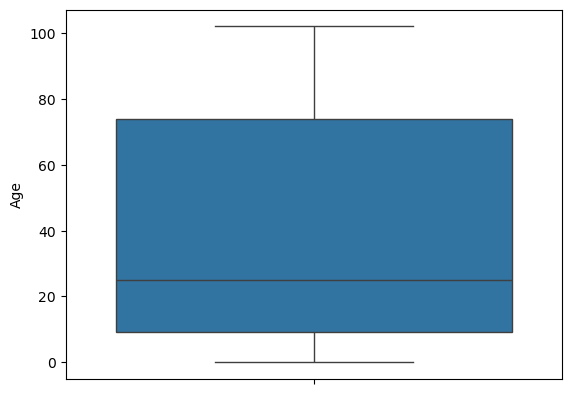

In [202]:
sns.boxplot(df["Age"])

In [168]:
#Great!! The age column has no outliers

<Axes: ylabel='Heart_Rate'>

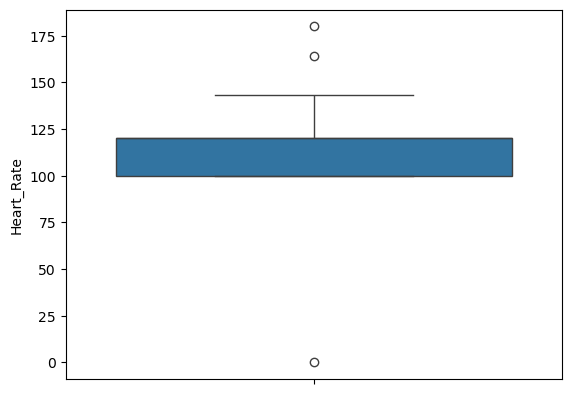

In [203]:
#Lets look at the Heart Rate column

sns.boxplot(df["Heart_Rate"])

In [204]:
#Lets look at the outliers closely

df[df["Heart_Rate"]>150]

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
18,PID1018,Patient_18,NaN,male,NaT,NaT,NaT,high blood pressure,164.0
68,PID1068,Patient_68,25.0,male,2021-12-18,2022-03-08,NaT,unknown,180.0


In [205]:
df[df["Heart_Rate"]<25]

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
94,PID1094,Patient_94,22.0,unknown,2016-08-10,2021-11-13,NaT,unknown,0.0


In [206]:
#Heart Rate 0.0!!!!! 

#We know that we have to remove row. I have not handles the null values yet. So 0.0 means its a 0.0

df.drop(df[df["Heart_Rate"] ==0.0].index)

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,female,2017-10-21,2018-05-05,NaT,high blood pressure,NaN
1,PID1001,Patient_1,0.0,female,2022-09-15,2024-01-24,NaT,unknown,120.0
2,PID1002,Patient_2,0.0,male,NaT,2021-03-14,NaT,unknown,120.0
3,PID1003,Patient_3,NaN,male,2017-09-11,2025-04-16,NaT,hypertension,NaN
5,PID1005,Patient_5,25.0,female,NaT,2016-05-19,2019-08-31,high blood pressure,100.0
...,...,...,...,...,...,...,...,...,...
92,PID1092,Patient_92,22.0,female,NaT,NaT,NaT,unknown,NaN
93,PID1093,Patient_93,NaN,male,NaT,NaT,2019-09-20,unknown,120.0
97,PID1097,Patient_97,NaN,unknown,NaT,2016-01-04,NaT,high blood pressure,120.0
98,PID1098,Patient_98,NaN,unknown,NaT,2015-07-16,NaT,unknown,120.0


In [148]:
#Even tho they are outliers, they still tell a story and having Heart Rate of that number is possible. Hence we are keeping these value

# Handling null values in Age and Heart_Rate columns

In [207]:
#Age

mean_age = round(df["Age"].mean())
df["Age"] = df["Age"].fillna(mean_age)

#Heart Rate
mode_heart_rate = df["Heart_Rate"].mode()[0]
df["Heart_Rate"]=df["Heart_Rate"].fillna(mode_heart_rate)

In [208]:
df.head()

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,female,2017-10-21,2018-05-05,NaT,high blood pressure,120.0
1,PID1001,Patient_1,0.0,female,2022-09-15,2024-01-24,NaT,unknown,120.0
2,PID1002,Patient_2,0.0,male,NaT,2021-03-14,NaT,unknown,120.0
3,PID1003,Patient_3,38.0,male,2017-09-11,2025-04-16,NaT,hypertension,120.0
5,PID1005,Patient_5,25.0,female,NaT,2016-05-19,2019-08-31,high blood pressure,100.0


In [209]:
#Now lets take a look at the null values in the dataset
df.isnull().sum()

Patient_ID             0
Name                   0
Age                    0
Gender                 0
Check_in_Date         27
First_Consultation    23
Next_Visit            45
Diagnosis              0
Heart_Rate             0
dtype: int64

In [152]:
#Totally valid. We are not going to handle these missing values since it would be a false visit. 
#Its like saying: 
#Doctor: You have visited the hospital on DD/MM/YYYY.
#Parient: No i have not. 
#Doctor: "But the DATA shows you have visited". 


#So lets avoid this situation

In [210]:
#Just to make sure that the datatypes are as per required
df.dtypes

Patient_ID                    object
Name                          object
Age                          float64
Gender                        object
Check_in_Date         datetime64[ns]
First_Consultation    datetime64[ns]
Next_Visit            datetime64[ns]
Diagnosis                     object
Heart_Rate                   float64
dtype: object

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient_ID          68 non-null     object        
 1   Name                68 non-null     object        
 2   Age                 68 non-null     float64       
 3   Gender              68 non-null     object        
 4   Check_in_Date       41 non-null     datetime64[ns]
 5   First_Consultation  45 non-null     datetime64[ns]
 6   Next_Visit          23 non-null     datetime64[ns]
 7   Diagnosis           68 non-null     object        
 8   Heart_Rate          68 non-null     float64       
dtypes: datetime64[ns](3), float64(2), object(4)
memory usage: 7.4+ KB


# The final Pre Processed Dataset is given as: 

In [212]:
df

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,0.0,female,2017-10-21,2018-05-05,NaT,high blood pressure,120.0
1,PID1001,Patient_1,0.0,female,2022-09-15,2024-01-24,NaT,unknown,120.0
2,PID1002,Patient_2,0.0,male,NaT,2021-03-14,NaT,unknown,120.0
3,PID1003,Patient_3,38.0,male,2017-09-11,2025-04-16,NaT,hypertension,120.0
5,PID1005,Patient_5,25.0,female,NaT,2016-05-19,2019-08-31,high blood pressure,100.0
...,...,...,...,...,...,...,...,...,...
93,PID1093,Patient_93,38.0,male,NaT,NaT,2019-09-20,unknown,120.0
94,PID1094,Patient_94,22.0,unknown,2016-08-10,2021-11-13,NaT,unknown,0.0
97,PID1097,Patient_97,38.0,unknown,NaT,2016-01-04,NaT,high blood pressure,120.0
98,PID1098,Patient_98,38.0,unknown,NaT,2015-07-16,NaT,unknown,120.0


In [213]:
# 1. Convert 0 → NaN
df['Age'] = df['Age'].replace(0.0, np.nan)


#There are 5-6 columns wit age = 0.0 so i decided to keep thesse as Null values as it is now.

In [218]:
df

,Patient_ID,Name,Age,Gender,Check_in_Date,First_Consultation,Next_Visit,Diagnosis,Heart_Rate
0,PID1000,Patient_0,NaN,female,2017-10-21,2018-05-05,NaT,high blood pressure,120.0
1,PID1001,Patient_1,NaN,female,2022-09-15,2024-01-24,NaT,unknown,120.0
2,PID1002,Patient_2,NaN,male,NaT,2021-03-14,NaT,unknown,120.0
3,PID1003,Patient_3,38.0,male,2017-09-11,2025-04-16,NaT,hypertension,120.0
5,PID1005,Patient_5,25.0,female,NaT,2016-05-19,2019-08-31,high blood pressure,100.0
...,...,...,...,...,...,...,...,...,...
93,PID1093,Patient_93,38.0,male,NaT,NaT,2019-09-20,unknown,120.0
94,PID1094,Patient_94,22.0,unknown,2016-08-10,2021-11-13,NaT,unknown,0.0
97,PID1097,Patient_97,38.0,unknown,NaT,2016-01-04,NaT,high blood pressure,120.0
98,PID1098,Patient_98,38.0,unknown,NaT,2015-07-16,NaT,unknown,120.0


In [217]:
df.to_excel('Pre-processed data.xlsx')

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_16388\3139102091.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


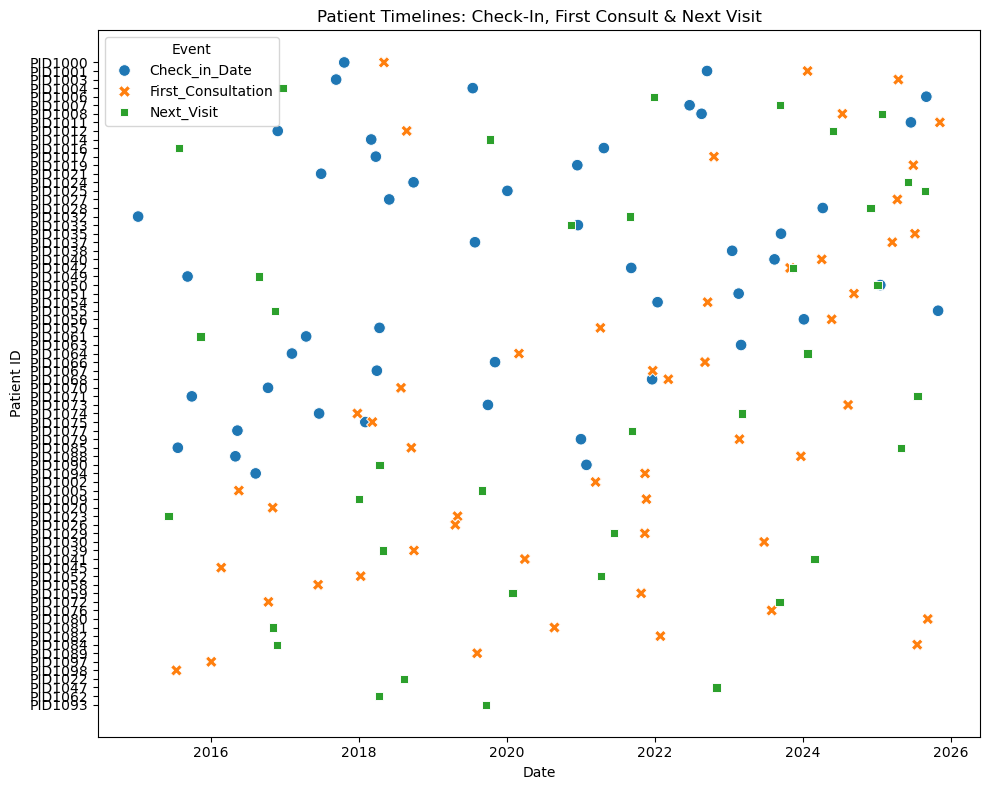

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make sure your dates are datetime
for col in ['Check_in_Date','First_Consultation','Next_Visit']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 2. Melt to long form
events = (
    df[['Patient_ID','Check_in_Date','First_Consultation','Next_Visit']]
      .melt(id_vars='Patient_ID',
            value_vars=['Check_in_Date','First_Consultation','Next_Visit'],
            var_name='event',
            value_name='date')
      .dropna(subset=['date'])
)

# 3. Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=events,
    x='date',
    y='Patient_ID',
    hue='event',
    style='event',
    s=70
)
plt.title("Patient Timelines: Check‑In, First Consult & Next Visit")
plt.xlabel("Date")
plt.ylabel("Patient ID")
plt.legend(title="Event")
plt.tight_layout()
plt.show()

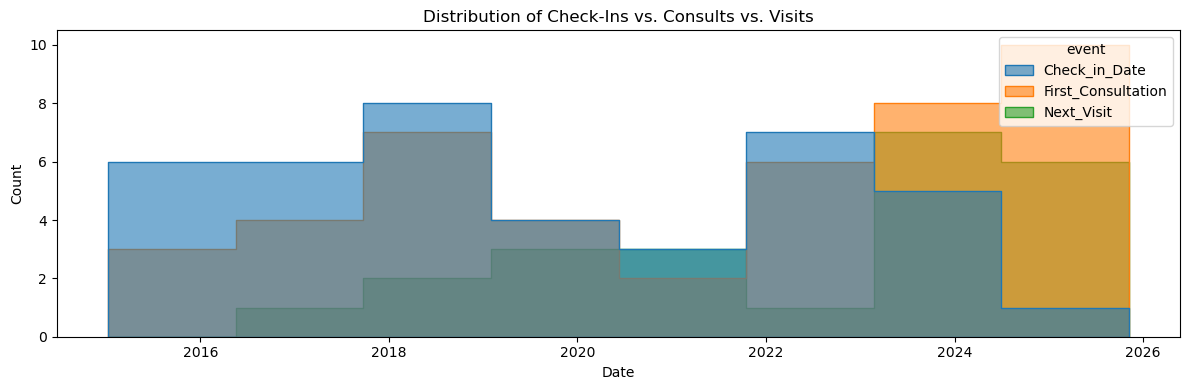

In [92]:
plt.figure(figsize=(12, 4))
sns.histplot(
    data=events,
    x='date',
    hue='event',
    multiple='layer',
    element='step',
    stat='count',
    alpha=0.6
)
plt.title("Distribution of Check‑Ins vs. Consults vs. Visits")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


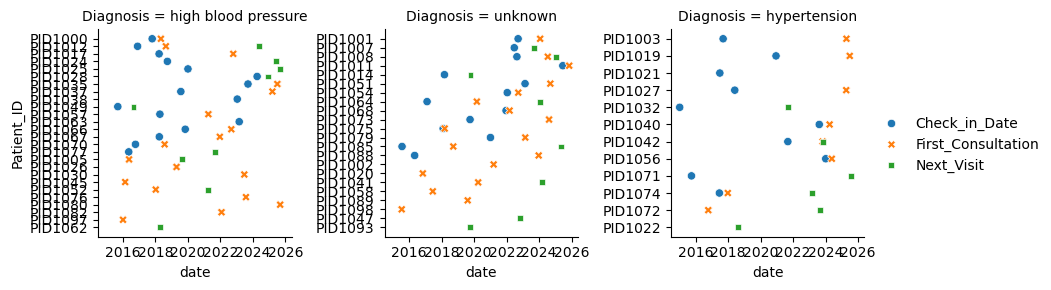

In [93]:
g = sns.FacetGrid(events.merge(df[['Patient_ID','Diagnosis']], on='Patient_ID'),
                  col='Diagnosis', height=3, sharey=False)
g.map_dataframe(sns.scatterplot, 'date', 'Patient_ID', hue='event', style='event')
g.add_legend()
